# 1. Load data from keras
train_data = 
[

　[評論1],

　[評論2],

　..　

]

train_labels = 
[

　評論1的label,

　評論2的label,

　..　

]

In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# 確認評論中最大的word 編碼是9999
index = max([max(seq) for seq in train_data ])
print('max index = {}'.format(index))

print(train_labels[:10])

Using TensorFlow backend.


max index = 9999
[1 0 0 1 0 0 1 0 1 0]


# 2.想看看index轉成單字的文章：

In [60]:
word_index = imdb.get_word_index()

index_word = dict([(val, key) for (key, val) in word_index.items()])

article_0_encode = train_data[0]

print(article_0_encode)

lsWords = [index_word.get(index-3, '?') for index in article_0_encode]

article_0 = ' '.join(lsWords)

print(article_0)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
? this film was just brilliant casting location scenery stor

# 3. one hot encoding 

In [8]:
import numpy as np

def oneHot(sequence, dimention=10000):
  result = np.zeros((len(sequence), dimention))
  for (batch_index, article_encode) in enumerate(sequence):
    result[batch_index, article_encode] = 1.
  return result

x_train = oneHot(train_data)
x_test = oneHot(test_data)

# x_train[0]
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

# 4. 準備train data & validation data

In [10]:
num_val = (int) (0.5 * len(train_data))
num_val = 10000
print('num val data = {}'.format(num_val))
x_val = x_train[:num_val]
x_partial_train = x_train[num_val:]

y_val= y_train[:num_val]
y_partial_train = y_train[num_val:]

num val data = 10000


# 5. Build model & train

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_partial_train, 
          y_partial_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.5064 - acc: 0.7787 - val_loss: 0.3708 - val_acc: 0.8715
Epoch 2/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.2974 - acc: 0.9035 - val_loss: 0.3051 - val_acc: 0.8832
Epoch 3/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.2225 - acc: 0.9272 - val_loss: 0.2858 - val_acc: 0.8854
Epoch 4/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.1774 - acc: 0.9439 - val_loss: 0.2748 - val_acc: 0.8877
Epoch 5/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.1428 - acc: 0.9549 - val_loss: 0.2879 - val_acc: 0.8839
Epoch 6/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.1171 - acc: 0.9642 - val_loss: 0.2969 - val_acc: 0.8827
Epoch 7/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.0968 - acc: 0.9713 - val_loss: 0.3176 - 

# 6. 畫圖看狀況

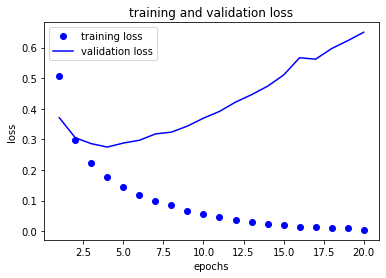

In [14]:
import matplotlib.pyplot as plt

# y軸資料
loss = history.history['loss']
val_loss = history.history['val_loss']

# x 軸資料 為epochs
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


In [83]:
result = model.evaluate(x_test, y_test)
result

25000/25000 [==============================] - 2s 72us/step


[1.4037336270493268, 0.8404]